# Analyzing a synthetized fbm

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
figure_folder = 'figures/fBm/'

## Generating a signal

Let's first generate a brownian motion (fractional brownian motion with H=0.8)

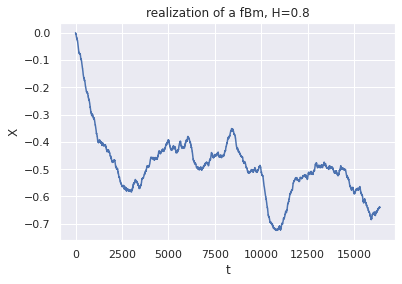

In [3]:
from pymultifracs.simul import fbm

X = fbm(shape=16384, H=0.8)

plt.plot(X)
plt.title('realization of a fBm, H=0.8')
plt.ylabel('X')
plt.xlabel('t')
plt.show()

## Power Spectral Density

Power spectral density analysis is done with the `psd` module

The sampling frequency `fs` is necessary in order to correctly label the frequency axis

In [4]:
import pymultifracs.psd as psd

fs  = 1

The Fourier-based PSD estimation is done using the Welch estimator.

The arguments relative the Fourier-based estimation are:
* `n_fft`: length of the FFT used
* `seg_size`: size of the segment used in the Welch estimation

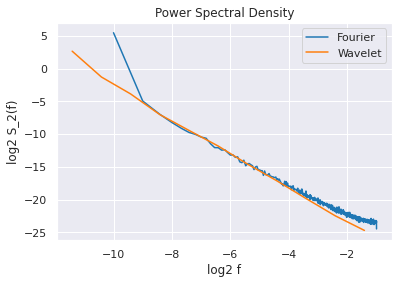

In [5]:
psd.plot_psd(X, fs, n_fft=1024)

The Wavelet-based estimation is done using wavelet analysis based on the Daubechies wavelet.

The number of vanishing moments can be controlled using the `n_moments` argument

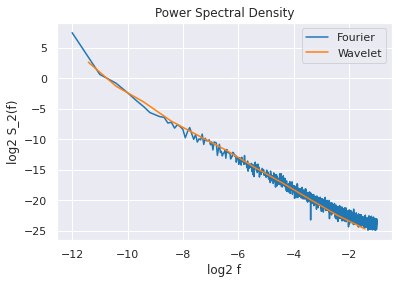

In [6]:
psd.plot_psd(X, fs, n_moments=2)

The wavelet-based estimation of the PSD is obtained via the `wavelet_estimation` function

In [7]:
PSD = psd.wavelet_estimation(X, fs, n_moments=3)

The output is an instance of the `PSD` namedtuple, with two fields: `freq` which contains the frequency support of the PSD estimation, and `psd` which contains the actual power estimates

In [8]:
PSD.freq, PSD.psd

(array([3.75000000e-01, 1.87500000e-01, 9.37500000e-02, 4.68750000e-02,
        2.34375000e-02, 1.17187500e-02, 5.85937500e-03, 2.92968750e-03,
        1.46484375e-03, 7.32421875e-04, 3.66210938e-04]),
 array([3.17109442e-08, 1.51660349e-07, 9.14023509e-07, 5.98623463e-06,
        3.30196197e-05, 2.01929842e-04, 1.16439224e-03, 6.45312680e-03,
        6.80526894e-02, 6.15929473e-01, 3.97059128e+00]))

## Wavelet Transform

Wavelet transform is performed in the package using the `wavelet` submodule

In [9]:
from pymultifracs.wavelet import wavelet_analysis

The wavelet analysis computes the wavelet coefficients and wavelet leaders (if specified) for a particular signal.

The output is a namedtuple with 3 fields:

* `wt_leaders`: The wavelet leaders if computed
* `wt_coefs`: Wavelet coefficients
* `j2_eff`: Maximum scale that the coefficients were effectively computed for

In [10]:
Y = fbm(shape=100, H=0.8)

In [11]:
WT = wavelet_analysis(Y)

/home/md262764/Multifracs/pymultifracs/pymultifracs/wavelet.py:110: UserWarning: Value of j2 is higher than the maximum allowed level. Max level and j2 set to 3
  warnings.warn("Value of j2 is higher than the maximum allowed level. "


The `j2` parameter controls the maximum scale at with the wavelet coefs and leaders will be computed

In [12]:
WT = wavelet_analysis(Y, j2=2)
WT.wt_coefs

MultiResolutionQuantity(formalism='wavelet coef', nj={1: 48, 2: 22, 3: 9}, values={1: array([ 9.56660203e-03,  2.71246498e-03,  2.90604441e-03, -2.16463121e-02,
        5.47373712e-03, -8.40896407e-03, -9.36752914e-03,  2.08182178e-02,
       -1.57160080e-02, -2.07610259e-03, -6.05876735e-03,  1.03531019e-02,
        1.04195953e-02, -6.24408959e-03, -4.01131193e-03,  2.08286968e-03,
        1.13605552e-02, -1.45537312e-02,  5.95581956e-03,  3.02499441e-03,
       -8.72709036e-03,  1.57186857e-02, -1.43503984e-02, -1.00793154e-03,
        8.57219966e-05,  1.71992072e-03,  1.12382833e-02, -6.99313391e-03,
        2.18490387e-03,  1.35718441e-02,  6.00246568e-04,  3.01919997e-03,
       -5.05449154e-03, -5.84252560e-05, -1.32133031e-02,  7.26691517e-04,
        6.90649967e-03, -2.31443182e-03,  4.07132999e-03, -1.24100510e-02,
        6.40148660e-03,  5.76891843e-03,  1.17814614e-02, -6.34565925e-03,
       -1.09720312e-02,  1.00051847e-02, -5.79604040e-03,  1.16378900e-02]), 2: array([-0

The `p_exp` parameter controls how wavelet leaders are computed: if set to an int, wavelet p-leaders will be computed, if set to `np.inf`, it will use the wavelet leaders. If it is left to None, only the wavelet coefs will be computed

In [13]:
WT = wavelet_analysis(Y, p_exp=None)
WT.wt_leaders

In [14]:
WT = wavelet_analysis(Y, p_exp=2)
WT.wt_leaders

MultiResolutionQuantity(formalism='wavelet p-leader', nj={1: 46, 2: 20, 3: 7}, values={1: array([0.0095666 , 0.02164631, 0.02164631, 0.02164631, 0.00936753,
       0.02081822, 0.02081822, 0.02081822, 0.01571601, 0.0103531 ,
       0.0104196 , 0.0104196 , 0.0104196 , 0.00624409, 0.01136056,
       0.01455373, 0.01455373, 0.01455373, 0.00872709, 0.01571869,
       0.01571869, 0.01571869, 0.0143504 , 0.00171992, 0.01123828,
       0.01123828, 0.01123828, 0.01357184, 0.01357184, 0.01357184,
       0.00505449, 0.00505449, 0.0132133 , 0.0132133 , 0.0132133 ,
       0.0069065 , 0.0069065 , 0.01241005, 0.01241005, 0.01241005,
       0.01178146, 0.01178146, 0.01178146, 0.01097203, 0.01097203,
       0.01163789]), 2: array([0.02744944, 0.02744944, 0.01831158, 0.01233654, 0.00817904,
       0.0114242 , 0.0114242 , 0.01233865, 0.01233865, 0.01233865,
       0.01126459, 0.01065345, 0.01065345, 0.01065345, 0.02092501,
       0.02092501, 0.02092501, 0.00974148, 0.00974148, 0.00924806]), 3: array([0.0

## Second order analysis

In [15]:
import pymultifracs.mfa as mfa
from pymultifracs.utils import build_q_log
import numpy as np

Basic parameters are:

`j1` and `j2`, which indicate respectively the minimum and the maximum scale to consider when fitting wavelet coefficients

`q` The values of q for which the wavelet coefficients will be estimated

`n_cumul` The maximum order of the cumulants to compute

The p_exponent parameters `p_exp` controls how wavelet leaders are used: if set to an int, it will use wavelet p-leaders, or if set to `np.inf`, it will use the wavelet leaders.

The output of the `mf_analysis_full` function contains two variables, `dwt` and `lwt`. The former contains the multifractal variables computed using the wavelet coefs, while the latter uses the wavelet leaders.

By default the `p_exp` parameter is set to `None`, which means the wavelet coefs only are used, and so the `lwt` variable returned is set to `None`

In [16]:
dwt, lwt = mfa.mf_analysis_full(X,
    j1=2, j2=8,
    q=np.array([2]),
    n_cumul=2,
)

In [17]:
print(lwt)

None


**Unpacking dwt**

The variable dwt contains three fields: the structure functions, cumulants, multifractal spectrum, and hmin estimate. They can be unpacked all at once, or called one by one

In [18]:
sf, cumul, mfs, hmin = dwt

In [19]:
sf = dwt.structure
hmin = dwt.hmin

**H estimate**

In [20]:
sf.H

0.7978115264106169

**structure functions**

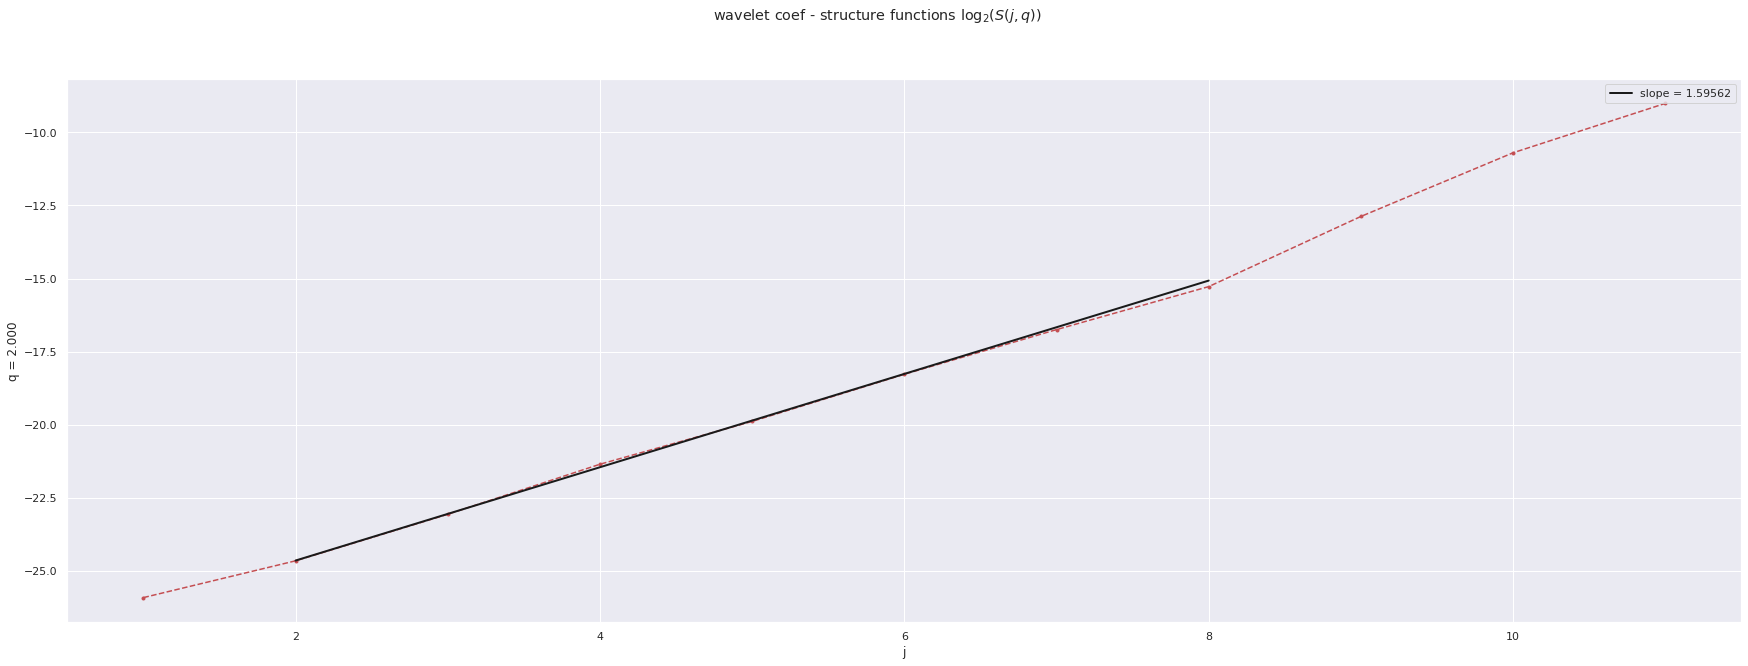

In [21]:
sf.plot(nrow=5)

## Multifractal Analysis

### Using wavelet leaders

In [22]:
dwt, lwt = mfa.mf_analysis_full(X,
    j1=3, j2=11,
    q=build_q_log(1, 10, 20),
    n_cumul=2,
    p_exp=np.inf,
    gamint=0.0
)

The `lwt` variable shares the same structure as `dwt`

In [23]:
lwt_sf, lwt_cumul, lwt_mfs, hmin = lwt

The `lwt_sf`, `lwt_cumul`, `lwt_mfs` variables defined here share the same structure as the `sf`, `cumul`, and `mfs` variables defined previously

**structure functions**

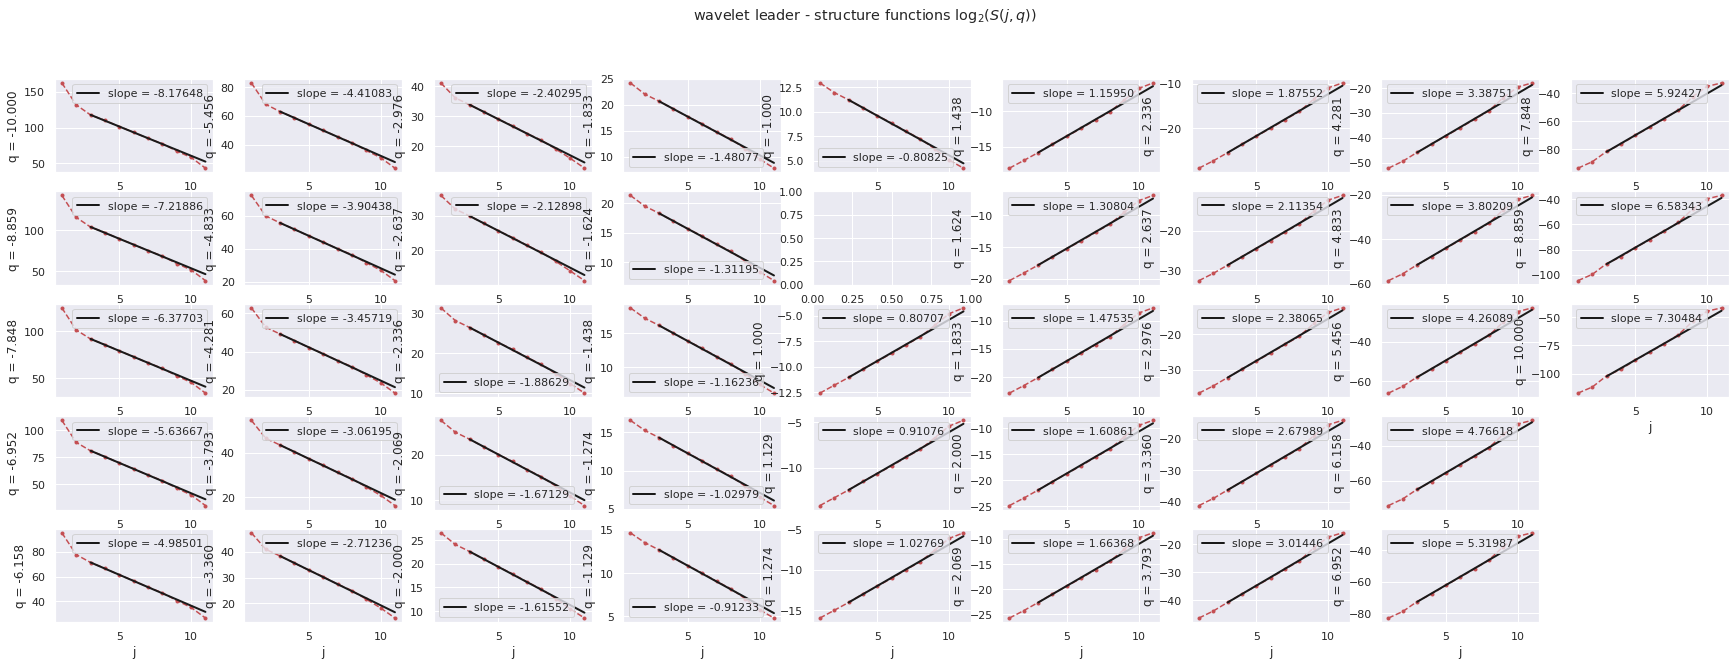

In [24]:
lwt_sf.plot(nrow=5)

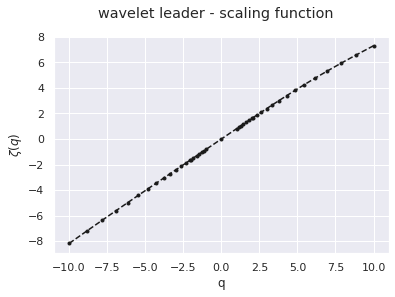

In [25]:
lwt_sf.plot_scaling()

**cumulants**

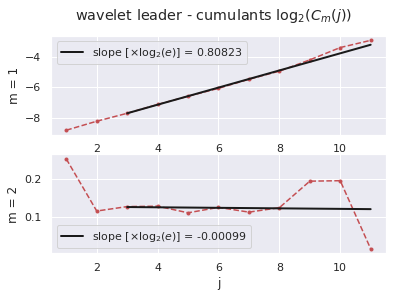

In [26]:
lwt_cumul.plot(nrow=3)

In [27]:
lwt_cumul.log_cumulants

array([ 0.80823422, -0.00098995])

**multifractal spectrum**

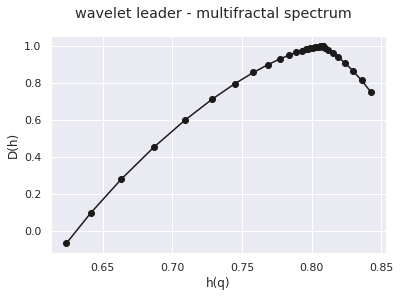

In [28]:
lwt_mfs.plot()

### Using p-leaders

In [29]:
dwt, lwt = mfa.mf_analysis_full(X,
    j1=2, j2=8,
    q=build_q_log(1, 10, 20),
    n_cumul=2,
    p_exp=2
)

The `lwt` variable shares the same structure as `dwt`

In [30]:
lwt_sf, lwt_cumul, lwt_mfs, hmin = lwt

The `lwt_sf`, `lwt_cumul`, `lwt_mfs` variables defined here share the same structure as the `sf`, `cumul`, and `mfs` variables defined previously

**structure functions**

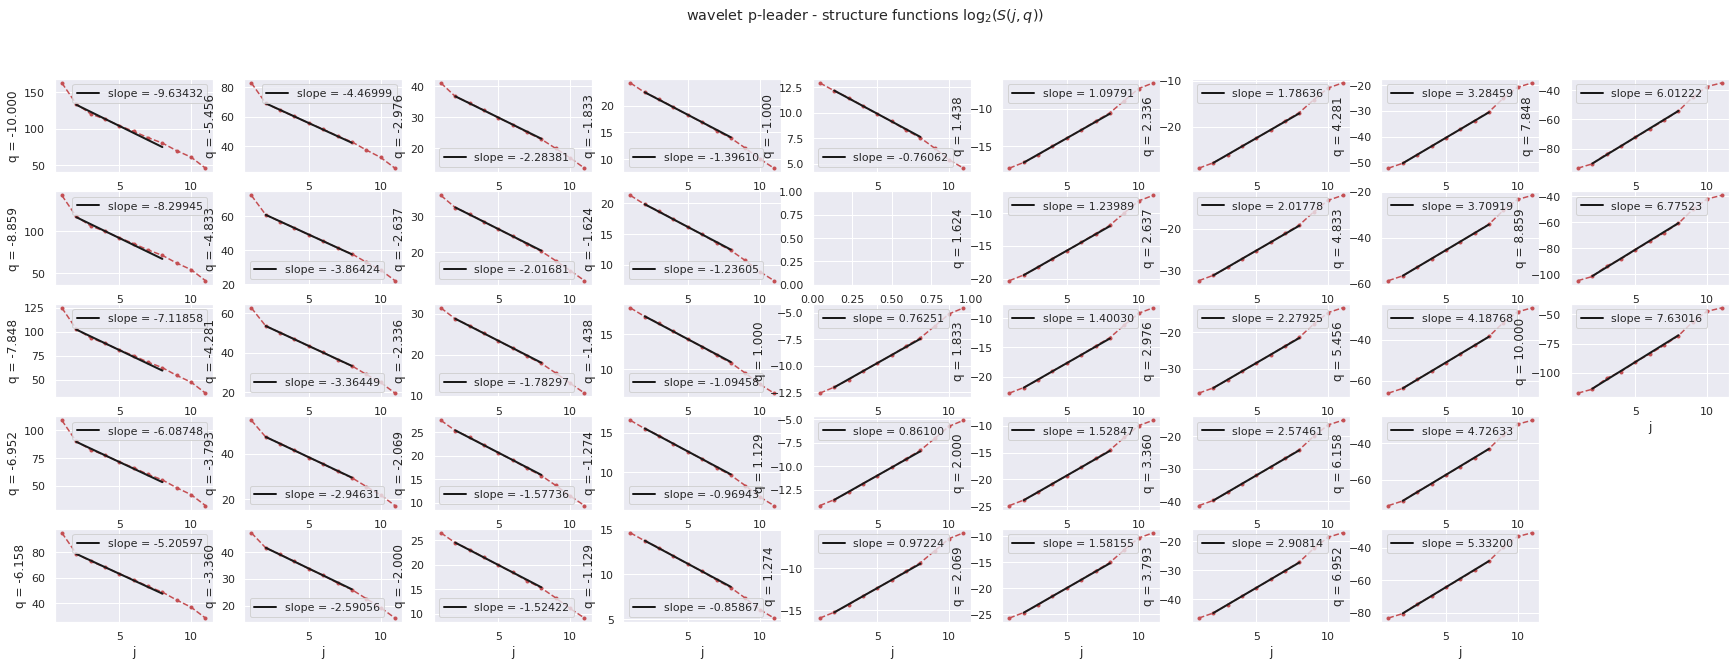

In [31]:
lwt_sf.plot(nrow=5)

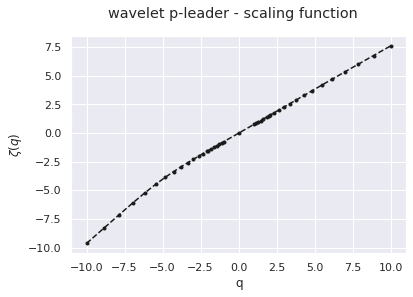

In [32]:
lwt_sf.plot_scaling()

**cumulants**

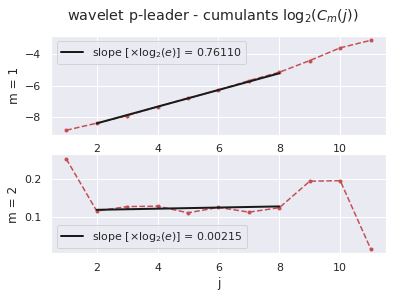

In [33]:
lwt_cumul.plot(nrow=3)

In [34]:
lwt_cumul.log_cumulants

array([0.76109694, 0.0021497 ])

**multifractal spectrum**

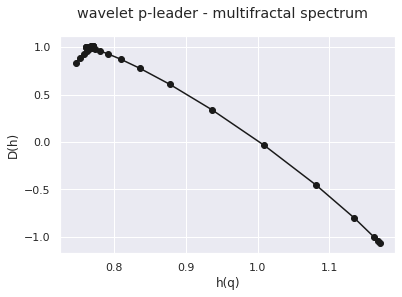

In [35]:
lwt_mfs.plot()